<a href="https://colab.research.google.com/github/meghasuresh18/Anime_Python_Project/blob/main/Anime_Popularity_%26_Genre_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# #Data Collection

In [ ]:
import pandas as pd
df = pd.read_csv('/content/anime.csv')


In [ ]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


Data Cleaning:

*   Handle missing values in rating, episodes, genres.
*   Convert object types (e.g., 'episodes') to numeric.
*   Parse genres into lists.


In [ ]:
df.tail()

,anime_id,name,genre,type,episodes,rating,members
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175
12293,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142


In [ ]:
#Fill missing ratings with average rating
df['rating'] = df['rating'].fillna(df['rating'].mean())

In [ ]:
#Filling missing genres with "Unknown"
df['genre'] = df['genre'].fillna('Unknown')

In [ ]:
#Fill missing Episodes with 0 (after converting to numeric)
df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce').fillna(0).astype(int) # converts non- numeric to NaN

In [ ]:
#Parse genres into lists.
df['genre_list'] = df['genre'].apply(lambda x: x.split(', ') if x!="unknown" else[])

 Exploratory Data Analysis (EDA)

In [ ]:
#a. Top genres by frequency
from collections import Counter
genre_counts = Counter(genre for sublist in df['genre'].str.split(', ') for genre in sublist)


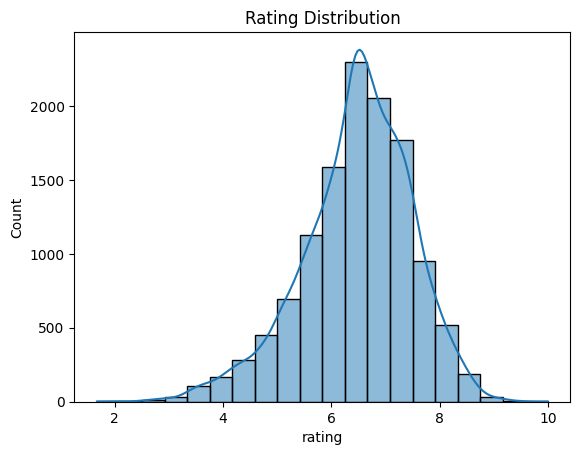

In [ ]:
# b. Rating distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['rating'], bins=20, kde=True)
plt.title("Rating Distribution")
plt.show()


<Axes: xlabel='episodes', ylabel='rating'>

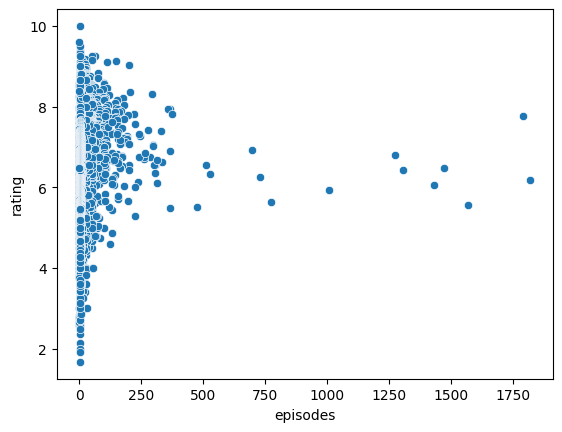

In [ ]:
#c. Episodes vs Rating (Does binge-length affect score?)
sns.scatterplot(data=df, x='episodes', y='rating')


<Axes: ylabel='name'>

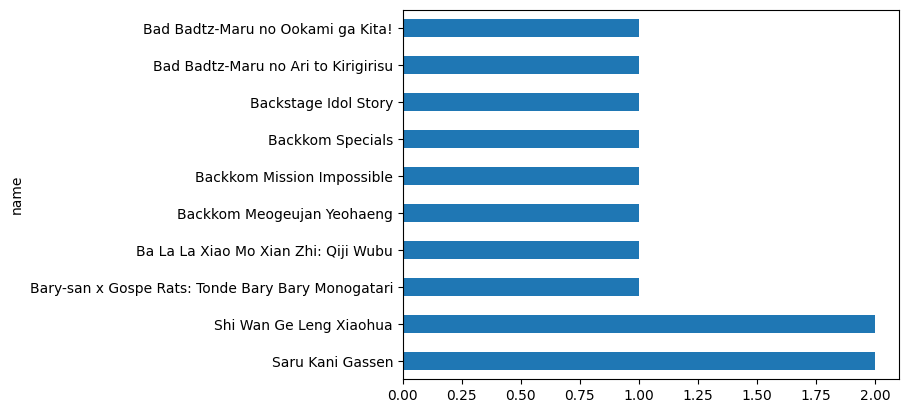

In [ ]:
#d. Most popular anime
df['name'].value_counts().head(10).plot(kind='barh')
